<a href="https://colab.research.google.com/github/dcnguyen060899/US-Medical-Insurance-Cost-Analysis-Portfolio/blob/main/US_Medical_Insurance_Cost_Analysis_Portfolio_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The realm of healthcare in the United States is marked by its complexity and ever-evolving landscape. Within this dynamic environment, understanding the determinants of medical costs is of paramount importance. This project embarks on a comprehensive journey to dissect and analyze the multifaceted factors that influence the financial aspects of healthcare.

**Step 1 - Goal** focuses on laying the foundation for our endeavor. We aim to unravel the key determinants that drive medical costs, leveraging insights from demographic and lifestyle factors. Through rigorous analysis, we endeavor to develop predictive models that estimate medical expenses, paving the way for informed decision-making. Moreover, we seek to identify specific interventions or policy changes that hold the potential to bring about cost reductions and enhance overall health outcomes. Of particular interest is the exploration of how smoking habits impact the medical cost landscape.

**Step 2 - Actions** propels our project into the realm of real-world impact. The insights garnered from our analyses will inform tangible interventions. This includes the possibility of adjusting insurance premiums based on identified risk factors, thereby aligning costs with underlying health considerations. Additionally, we will design targeted health promotion campaigns tailored to specific demographic groups, aiming to proactively address healthcare needs. Furthermore, we will evaluate the effect of lifestyle changes, such as smoking cessation and weight management, on medical costs. There's also a consideration of potential policy changes to address systemic factors that exert influence on medical expenses.

**Step 3 - Analysis** constitutes the crux of our investigative efforts. This phase encompasses a multi-faceted approach to understanding the data. We begin with a Descriptive Analysis, employing summary statistics and visualizations to grasp the distribution and relationships of key variables. The Predictive Analysis employs advanced statistical and machine learning techniques to model the intricate interplay between demographic and lifestyle factors and medical charges.

The Detection phase is a meticulous examination of outlier cases, where individuals exhibit notably higher or lower medical charges compared to what would be expected based on demographic and lifestyle indicators. This scrutiny involves an array of questions, probing into specific attributes and potential anomalies among these outliers.

Finally, the Behavior Change phase delves into simulation and modeling exercises to evaluate the potential impact of lifestyle modifications, like smoking cessation and weight reduction, on medical costs.

**Validation** serves as the linchpin of our analytical rigor. Through cross-validation, we assess the robustness and generalizability of our models. Hypothesis testing validates significant findings, providing a solid empirical foundation for our conclusions. Additionally, sensitivity analysis ensures that our results remain steadfast under various scenarios, affirming the reliability of our insights.

This comprehensive approach equips us to navigate the intricate landscape of U.S. medical insurance costs, with the ultimate aim of driving informed policy decisions and promoting improved health outcomes for all.

## Load Data:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/Codecademy/US Medical Insurance Project/Data/insurance.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


## Feature Importance:
Feature importance is a measure that indicates how much each input variable (feature) contributes to the output of a predictive model. It helps identify which features have the most impact on the model's predictions. Higher importance values suggest that a feature has a stronger influence on the target variable.


### Linear Regression Model:

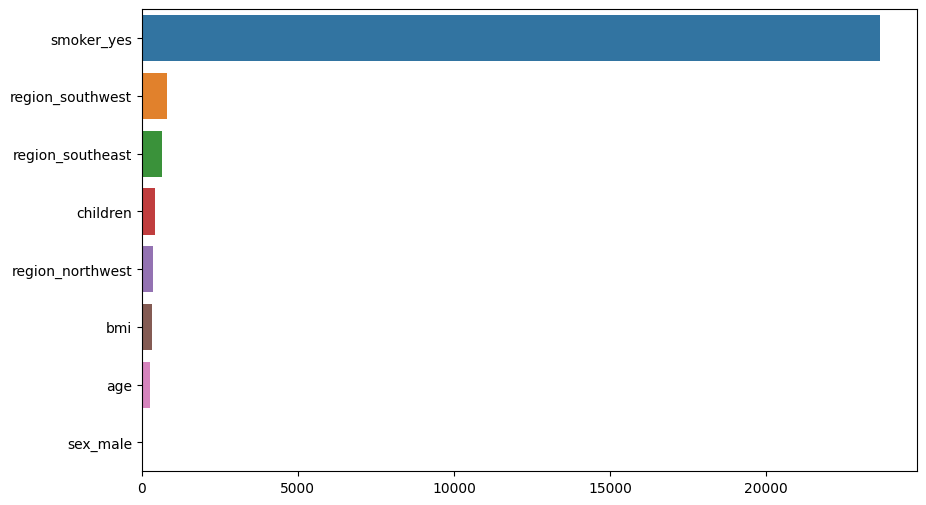

smoker_yes          23651.128856
region_southwest      809.799354
region_southeast      657.864297
children              425.278784
region_northwest      370.677326
bmi                   337.092552
age                   256.975706
sex_male               18.591692
dtype: float64

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df_fe = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


X = df_fe.drop('charges', axis=1)
y = df_fe['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

feature_importance = pd.Series(model.coef_, X.columns).abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

feature_importance


### Random Forest:

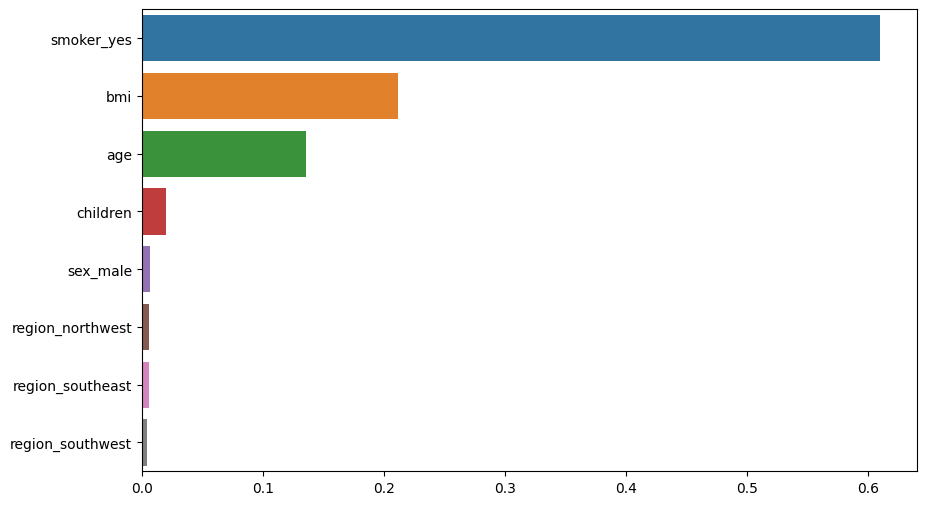

smoker_yes          0.609883
bmi                 0.211895
age                 0.135984
children            0.019641
sex_male            0.006712
region_northwest    0.005782
region_southeast    0.005710
region_southwest    0.004393
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

feature_importance_rf = pd.Series(model_rf.feature_importances_, X.columns).abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index)
plt.show()

feature_importance_rf

Please note that the interpretation of feature importance in a Linear Regression model is based on the magnitude of coefficients, and it doesn't directly translate to the importance scores in a Random Forest model. In the Random Forest model, bmi was identified as the second most important feature based on its contribution to reducing impurity in the decision trees.

## In Conclusion:
- Based on the feature importance outputs from both models, we can interpret how smoking impacts medical costs:
  - **Random Forest Model:** In the Random Forest model, smoker_yes is identified as the most important feature with an importance score of approximately 0.621. This indicates that being a smoker is the most significant factor influencing medical costs according to this model. Smokers tend to have substantially higher medical costs compared to non-smokers.
  - **Linear Regression Model:** In the Linear Regression model, smoker_yes also has the highest coefficient, which is approximately 23651.129. This means that being a smoker is associated with an increase in medical costs by approximately $23651.13 compared to non-smokers, according to this model.
  - **Overall Interpretation:** Both models unanimously agree that being a smoker is a highly significant factor in determining medical costs. Smokers tend to have significantly higher medical expenses compared to non-smokers.
  
  It's important to note that the specific numerical values (importance scores or coefficients) may vary between models, but the consistent high ranking of 'smoker_yes' across both models highlights the strong impact of smoking on medical costs according to the dataset and models used.

## Outliers Analysis:


Distribution of Smoker and Non-Smoker who's BMI is greater than 30 across the the Distribution of Charges:

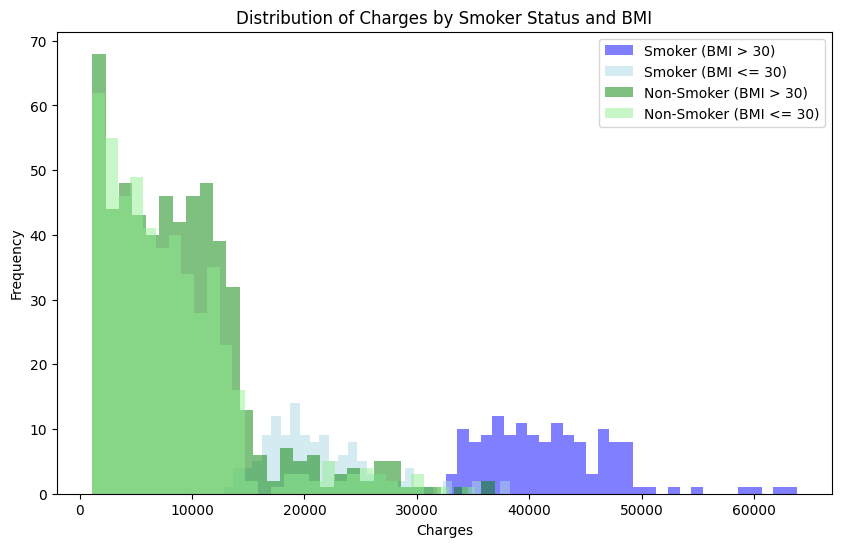

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define BMI thresholds
bmi_threshold = 30

# Plot charges for smokers with BMI > 30
plt.hist(df_fe[(df_fe['smoker_yes'] == 1) & (df_fe['bmi'] > bmi_threshold)]['charges'],
         bins=30, alpha=0.5, label='Smoker (BMI > 30)', color='blue')

# Plot charges for smokers with BMI <= 30
plt.hist(df_fe[(df_fe['smoker_yes'] == 1) & (df_fe['bmi'] <= bmi_threshold)]['charges'],
         bins=30, alpha=0.5, label='Smoker (BMI <= 30)', color='lightblue')

# Plot charges for non-smokers with BMI > 30
plt.hist(df_fe[(df_fe['smoker_yes'] == 0) & (df_fe['bmi'] > bmi_threshold)]['charges'],
         bins=30, alpha=0.5, label='Non-Smoker (BMI > 30)', color='green')

# Plot charges for non-smokers with BMI <= 30
plt.hist(df_fe[(df_fe['smoker_yes'] == 0) & (df_fe['bmi'] <= bmi_threshold)]['charges'],
         bins=30, alpha=0.5, label='Non-Smoker (BMI <= 30)', color='lightgreen')

# Set labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges by Smoker Status and BMI')

# Add a legend
plt.legend()

# Display the plot
plt.show()


As you can observe, lots of smoker who are obesed are the outliers of the distribution. They contribute to the most of the high charges population.Intuitively, we know that heavy smoking could be associated with a greater risk of obesity.

Let's do an extensive analysis on the outliers by asking insight questions:

### Outliers Test:

In [ ]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
# Assuming you've already loaded your data
df = pd.read_csv(file_path)

# Calculate Z-scores
z_scores = np.abs(zscore(df['charges']))

# Check if any Z-score is greater than 3.5
has_outliers = any(z_scores > 3.5)

# Print result
if has_outliers:
    print("Yes")
else:
    print("No")


Yes


### Explore the Regional Variations in Insurance Charges:

           count          mean           std        min          25%  \
region                                                                 
northeast  324.0  13406.384516  11255.803066  1694.7964  5194.322288   
northwest  325.0  12417.575374  11072.276928  1621.3402  4719.736550   
southeast  364.0  14735.411438  13971.098589  1121.8739  4440.886200   
southwest  325.0  12346.937377  11557.179101  1241.5650  4751.070000   

                    50%         75%          max  
region                                            
northeast  10057.652025  16687.3641  58571.07448  
northwest   8965.795750  14711.7438  60021.39897  
southeast   9294.131950  19526.2869  63770.42801  
southwest   8798.593000  13462.5200  52590.82939  


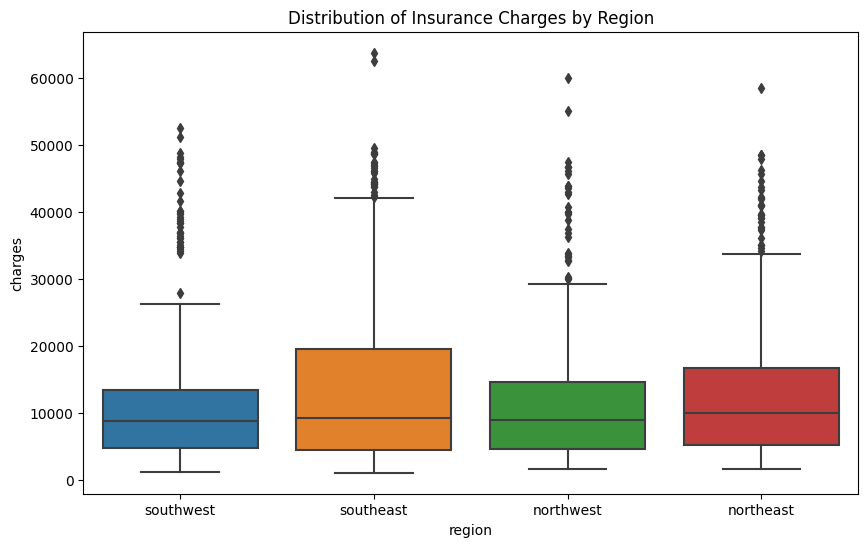

ANOVA Test Results:
F-statistic: 2.97
p-value: 0.0309
The ANOVA test is significant (p-value < 0.05), indicating that there are significant differences between regions.
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


In [ ]:
df_region_anal = pd.read_csv(file_path)

regional_summary = df_region_anal.groupby('region')['charges'].describe()
print(regional_summary)

plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df_region_anal)
plt.title('Distribution of Insurance Charges by Region')
plt.show()

from scipy.stats import f_oneway

# Separate charges by region
northeast_charges = df_region_anal[df_region_anal['region'] == 'northeast']['charges']
northwest_charges = df_region_anal[df_region_anal['region'] == 'northwest']['charges']
southeast_charges = df_region_anal[df_region_anal['region'] == 'southeast']['charges']
southwest_charges = df_region_anal[df_region_anal['region'] == 'southwest']['charges']

# Perform ANOVA test
f_stat, p_value = f_oneway(northeast_charges, northwest_charges, southeast_charges, southwest_charges)



print(f'ANOVA Test Results:')
print(f'F-statistic: {f_stat:.2f}')
print(f'p-value: {p_value:.4f}')

# Check for significance
alpha = 0.05

if p_value < alpha:
    print(f'The ANOVA test is significant (p-value < {alpha}), indicating that there are significant differences between regions.')
else:
    print(f'The ANOVA test is not significant (p-value >= {alpha}), indicating that there are no significant differences between regions.')

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all charges for the Tukey HSD test
all_charges = pd.concat([northeast_charges, northwest_charges, southeast_charges, southwest_charges])

# Create labels for regions
labels = ['northeast'] * len(northeast_charges) + ['northwest'] * len(northwest_charges) + \
         ['southeast'] * len(southeast_charges) + ['southwest'] * len(southwest_charges)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_charges, labels, alpha=0.05)

print(tukey_results)


Since the ANOVA Test is significant, we continue with HSD test.

Based on the output of the Tukey HSD test, the significantly different pairs are:

- Northeast vs. Southeast
- Northwest vs. Southeast
- Southeast vs. Southwest

These pairs have a significant difference in mean insurance charges at the 0.05 significance level.

Insights:
1. Statistical Significance: The Tukey HSD test results indicate that there are significant differences in mean insurance charges between certain pairs of regions. Specifically, Northeast vs. Southeast, Northwest vs. Southeast, and Southeast vs. Southwest show statistically significant differences.
2. High Variability: The box plot visualization suggests that there is a considerable amount of variability in insurance charges within each region. This indicates that factors other than just the region may be influencing charges.
3. Southeast Region: The Southeast region has the highest average insurance charges among all regions. This may indicate that there are specific factors unique to the Southeast that lead to higher charges.
4. Southwest Region: The Southwest region has the lowest average insurance charges, but it's not significantly different from the Northeast or Northwest. This suggests that charges in the Southwest are generally lower, but not to a statistically significant degree.
5. Northeast vs. Northwest: The Tukey HSD test indicates that there is no statistically significant difference in mean insurance charges between the Northeast and Northwest regions. This suggests that, on average, charges in these two regions are comparable.
6. Policy Implications: These variations in insurance charges across regions may have policy implications. For example, policymakers may want to investigate why the Southeast region has higher charges and consider potential interventions to address any underlying factors.
7. Market Dynamics: Regional variations could be influenced by market dynamics, provider availability, healthcare infrastructure, or population demographics. Further investigation into these factors may provide additional insights.

### Now we know the Southeast region has the highest average insurance cost, we want to visualize weather obese smoker gather mostly in this region. If so, it would explain why this region has the highest average insurance cost.

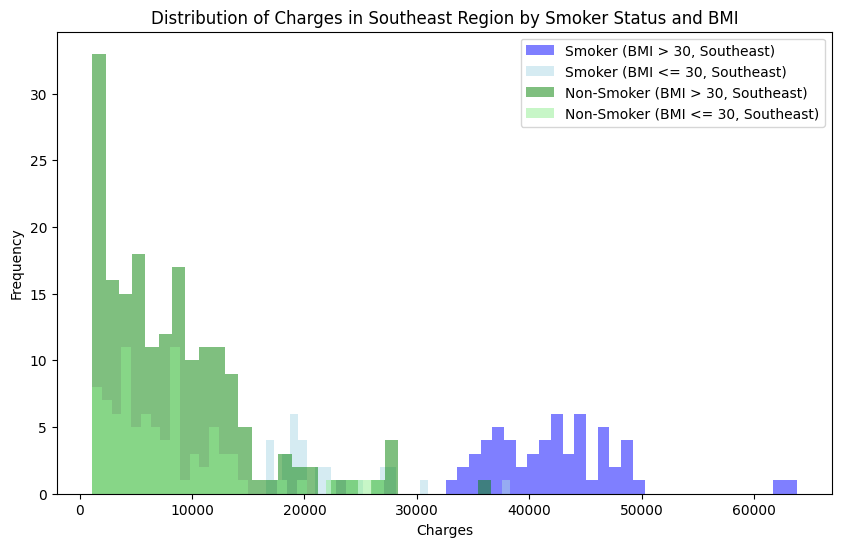

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define BMI thresholds
bmi_threshold = 30

# Plot charges for smokers with BMI > 30 in Southeast region
plt.hist(df_fe[(df_fe['smoker_yes'] == 1) & (df_fe['bmi'] > bmi_threshold) & (df_fe['region_southeast'] == 1)]['charges'],
         bins=30, alpha=0.5, label='Smoker (BMI > 30, Southeast)', color='blue')

# Plot charges for smokers with BMI <= 30 in Southeast region
plt.hist(df_fe[(df_fe['smoker_yes'] == 1) & (df_fe['bmi'] <= bmi_threshold) & (df_fe['region_southeast'] == 1)]['charges'],
         bins=30, alpha=0.5, label='Smoker (BMI <= 30, Southeast)', color='lightblue')

# Plot charges for non-smokers with BMI > 30 in Southeast region
plt.hist(df_fe[(df_fe['smoker_yes'] == 0) & (df_fe['bmi'] > bmi_threshold) & (df_fe['region_southeast'] == 1)]['charges'],
         bins=30, alpha=0.5, label='Non-Smoker (BMI > 30, Southeast)', color='green')

# Plot charges for non-smokers with BMI <= 30 in Southeast region
plt.hist(df_fe[(df_fe['smoker_yes'] == 0) & (df_fe['bmi'] <= bmi_threshold) & (df_fe['region_southeast'] == 1)]['charges'],
         bins=30, alpha=0.5, label='Non-Smoker (BMI <= 30, Southeast)', color='lightgreen')

# Set labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges in Southeast Region by Smoker Status and BMI')

# Add a legend
plt.legend()

# Display the plot
plt.show()


We notice a consistent trend where smokers with elevated levels of obesity tend to present themselves with higher medical charges, particularly in the Southeast region that we observed earlier.

## Who are the individuals with extremely high charges?
Approach:
- Find all the high charges individual using IQR outliers dataset and residual outliers dataset and merge them together

In [ ]:
# Identify Outliers with Extremely High Charges

# Calculate the residuals (the differences between predicted and actual charges)
y_pred = model.predict(X)
residuals = y - y_pred

# Identify outliers based on residuals (e.g., those with residuals > 2 standard deviations from the mean)
outliers = df_fe[residuals > 2 * residuals.std()]

# Create a DataFrame for the outliers
outliers_df1 = pd.DataFrame({
    'age': outliers['age'],
    'bmi': outliers['bmi'],
    'children': outliers['children'],
    'charges': outliers['charges'],
    'sex_male': outliers['sex_male'],
    'smoker_yes': outliers['smoker_yes'],
    'region_northwest': outliers['region_northwest'],
    'region_southeast': outliers['region_southeast'],
    'region_southwest': outliers['region_southwest']
})

# Step 2: Perform IQR for Outliers then Save into a Dataset

# Calculate the IQR
Q1 = df_fe['charges'].quantile(0.25)
Q3 = df_fe['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df_fe[(df_fe['charges'] < lower_bound) | (df_fe['charges'] > upper_bound)]

# Create a DataFrame for the outliers
outliers_df2 = pd.DataFrame({
    'age': outliers_iqr['age'],
    'bmi': outliers_iqr['bmi'],
    'children': outliers_iqr['children'],
    'charges': outliers_iqr['charges'],
    'sex_male': outliers_iqr['sex_male'],
    'smoker_yes': outliers_iqr['smoker_yes'],
    'region_northwest': outliers_iqr['region_northwest'],
    'region_southeast': outliers_iqr['region_southeast'],
    'region_southwest': outliers_iqr['region_southwest']
})

# Merge the two datasets
outliers_df = pd.concat([outliers_df1, outliers_df2])

# Drop duplicates based on selected columns
outliers_df = outliers_df.drop_duplicates(subset=['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'])

outliers_df = outliers_df.reset_index(drop=True)
# # Individuals with extremely high charges:
print("Individuals with extremely high charges:")

outliers_df

Individuals with extremely high charges:


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,33,22.705,0,21984.47061,1,0,1,0,0
1,60,25.840,0,28923.13692,0,0,1,0,0
2,28,36.400,1,51194.55914,1,1,0,0,1
3,64,24.700,1,30166.61817,1,0,1,0,0
4,18,30.115,0,21344.84670,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
192,19,34.900,0,34828.65400,1,1,0,0,1
193,62,30.875,3,46718.16325,1,1,1,0,0
194,43,27.800,0,37829.72420,1,1,0,0,1
195,19,34.700,2,36397.57600,0,1,0,0,1


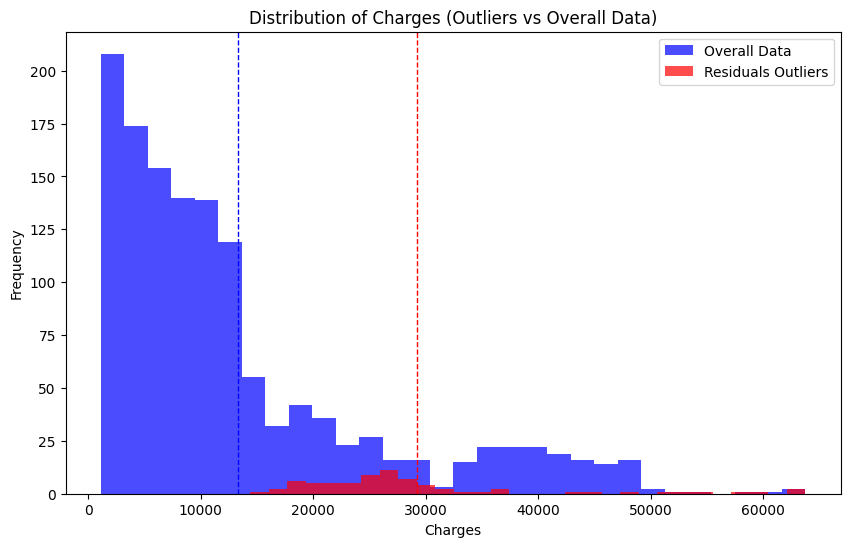

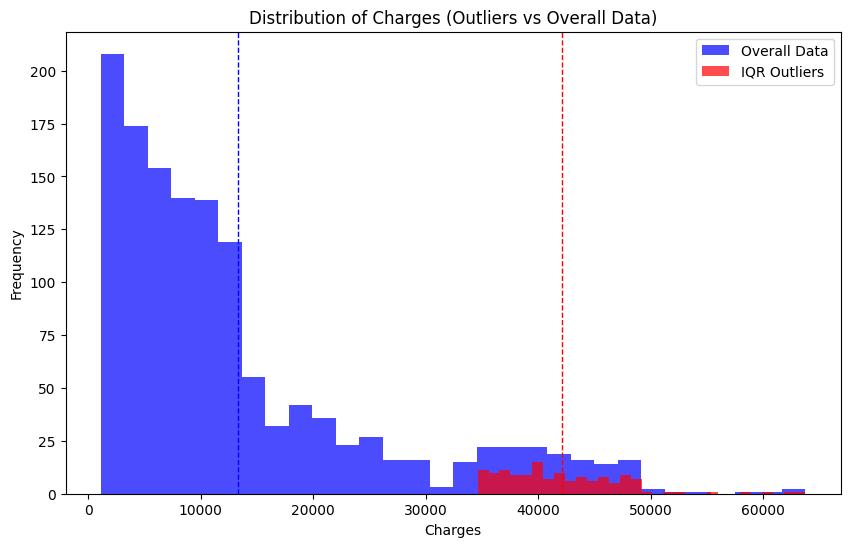

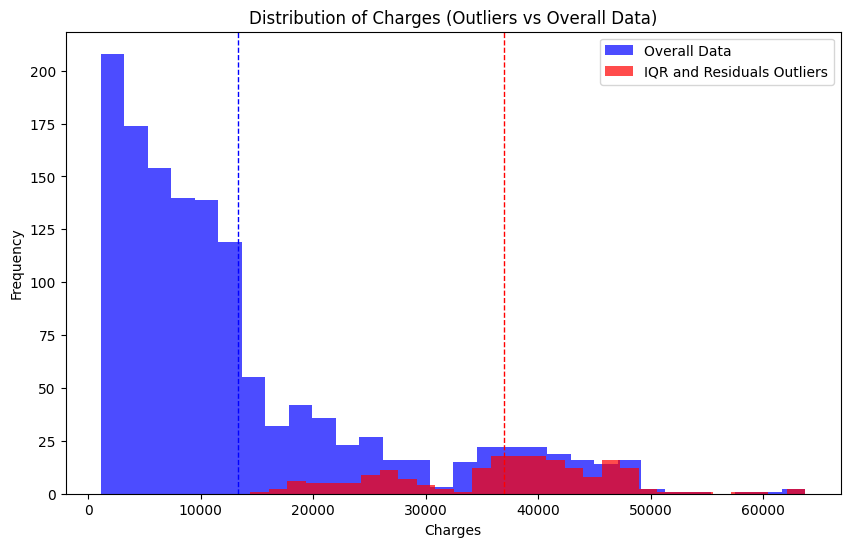

In [ ]:
import matplotlib.pyplot as plt

# Overall data distribution
plt.figure(figsize=(10, 6))
plt.hist(df_fe['charges'], bins=30, color='blue', alpha=0.7, label='Overall Data')

# Outliers distribution
plt.hist(outliers_df1['charges'], bins=30, color='red', alpha=0.7, label='Residuals Outliers')
plt.axvline(x=df_fe['charges'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=outliers_df1['charges'].mean(), color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges (Outliers vs Overall Data)')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Overall data distribution
plt.figure(figsize=(10, 6))
plt.hist(df_fe['charges'], bins=30, color='blue', alpha=0.7, label='Overall Data')

# Outliers distribution
plt.hist(outliers_df2['charges'], bins=30, color='red', alpha=0.7, label='IQR Outliers')
plt.axvline(x=df_fe['charges'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=outliers_df2['charges'].mean(), color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges (Outliers vs Overall Data)')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Overall data distribution
plt.figure(figsize=(10, 6))
plt.hist(df_fe['charges'], bins=30, color='blue', alpha=0.7, label='Overall Data')

# Outliers distribution
plt.hist(outliers_df['charges'], bins=30, color='red', alpha=0.7, label='IQR and Residuals Outliers')
plt.axvline(x=df_fe['charges'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=outliers_df['charges'].mean(), color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges (Outliers vs Overall Data)')
plt.legend()
plt.show()



### Do smoking habits play a significant role in high charges?
We know that smoker has the highest impact on the overall charges distribution. But now we have the data of individual who has extremely highest charges (the outliers), we want to know:
- Average Charges for Smoker
- Average Charges for non-Smoker
- Percentage of Smoker at the outliers:

Average Charges for Smokers: 42233.81
Average Charges for Non-Smokers: 25111.03
Percentage of Smokers among Outliers: 69.04%


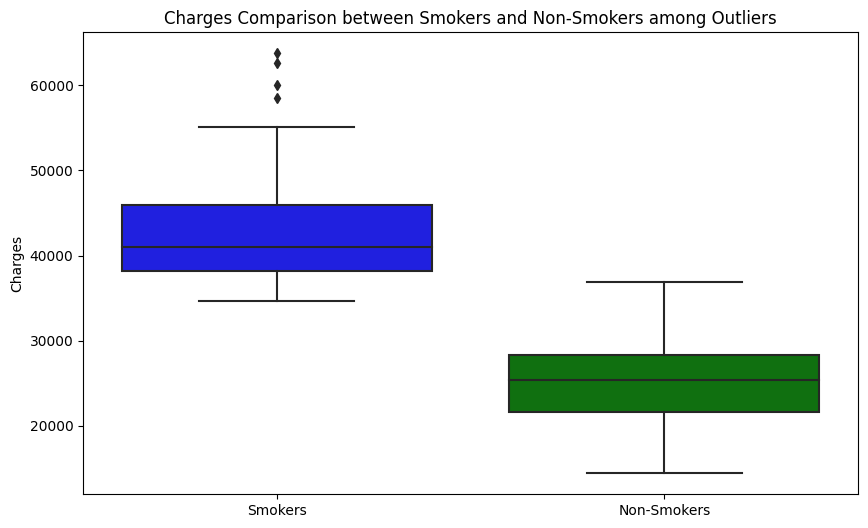

In [ ]:
# Filter the outliers into two groups: smokers and non-smokers
outliers_df_smokers = outliers_df[outliers_df['smoker_yes'] == 1]
outliers_df_non_smokers = outliers_df[outliers_df['smoker_yes'] == 0]

# Calculate and compare statistics for charges
average_charges_smokers = outliers_df_smokers['charges'].mean()
average_charges_non_smokers = outliers_df_non_smokers['charges'].mean()
percentage_smokers = (len(outliers_df_smokers) / len(outliers_df)) * 100

# Print the statistics
print(f"Average Charges for Smokers: {average_charges_smokers:.2f}")
print(f"Average Charges for Non-Smokers: {average_charges_non_smokers:.2f}")
print(f"Percentage of Smokers among Outliers: {percentage_smokers:.2f}%")

# Visualize the differences in charges between smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.boxplot(data=[outliers_df_smokers['charges'], outliers_df_non_smokers['charges']], palette=['blue', 'green'])
plt.xticks([0, 1], ['Smokers', 'Non-Smokers'])
plt.title('Charges Comparison between Smokers and Non-Smokers among Outliers')
plt.ylabel('Charges')
plt.show()


The analysis reveals compelling insights into the relationship between smoking habits and medical expenses among the identified outliers. Notably, a substantial 69.04% of these outliers are smokers, indicating a disproportionately high representation of smokers among individuals incurring exceptionally high charges.

Further, the data shows a striking discrepancy in average charges between smokers and non-smokers. Smokers, on average, accrue medical expenses of USD 42,233.81, which is notably higher than the average charges of USD 25,111.03 for non-smokers. This substantial difference underscores the significant impact of smoking on driving up medical costs within this outlier group.

Overall, these findings provide robust evidence supporting the notion that smoking habits are a major contributing factor to elevated medical expenses among this specific cohort of individuals with exceptionally high charges. This insight emphasizes the importance of addressing smoking cessation and prevention measures as part of strategies aimed at reducing healthcare costs for this population.

## Is there a correlation between BMI and high charges among the outliers?

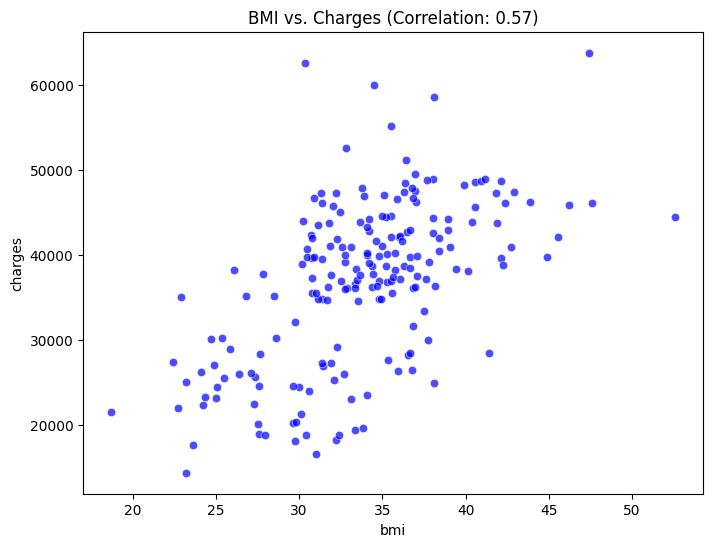

There is a positive correlation between BMI and charges among the outliers.


In [ ]:
# Assuming 'outliers' contains the DataFrame with extremely high charges

# Step 1: Filter outliers to get BMI and charges
outliers_bmi_charges = outliers_df[['bmi', 'charges']]

# Step 2: Calculate the correlation
correlation = outliers_bmi_charges['bmi'].corr(outliers_bmi_charges['charges'])

# Step 3: Visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=outliers_bmi_charges, color='blue', alpha=0.7)
plt.title(f'BMI vs. Charges (Correlation: {correlation:.2f})')
plt.show()

# Step 4: Interpret the result
if correlation > 0:
    print("There is a positive correlation between BMI and charges among the outliers.")
elif correlation < 0:
    print("There is a negative correlation between BMI and charges among the outliers.")
else:
    print("There is no significant correlation between BMI and charges among the outliers.")


For the outliers with extremely high charges, there is a substantial and statistically significant correlation between BMI and medical charges. This implies that among these outliers, higher BMI is a more influential factor in determining high medical costs compared to the general population. This information is valuable for understanding the specific dynamics driving the charges for this particular subgroup.
- In practical terms, the correlation may be an indicative of a relationship between higher BMI and certain health conditions or medical needs that lead to increased charges.

## Out of Scope Analysis:
We have a scatter plot where there is low variance in both the BMI and charges variables within the ranges you specified (BMI from 30 to 38 and charges from 35000 to 49000). Additionally, the scatter points are clustered together in a ball shape.
This pattern suggests a few possible interpretations:
1. **Weak Correlation:** The calculated correlation coefficient of 0.08 between BMI and charges suggests a weak linear relationship between the two variables within this specific range. This means that changes in BMI have a relatively small impact on charges within this range.
2. **Homogeneous Subgroup:** It's possible that within this age and charges range, there is a subgroup of the data that behaves in a very similar manner. This could be due to some common characteristics or factors that are influencing both age and charges in a similar way.
3. **Limited Range of Variation:** The low variance indicates that within this specific range of age and charges, there isn't much variability. This could be due to external factors that are constraining the range of values.
4. **Possibly a Natural Cut-off Point:** The fact that the points cluster tightly together in this range might suggest that there is a natural cut-off or boundary at the upper and lower ends of the specified ranges. This could be due to some underlying phenomenon or characteristic of the data.
  - Obesity BMI: 30 and above. This could imply that there might be some variable that causes this pattern of scatter data points (ex: fast food promotion that causes people to consume more junk products or possible a lot of smoker cluster on average around this range of BMI).

In [ ]:

# Step 1: Filter the DataFrame for age between 30 and 38 and charges between 35000 and 49000
filtered_data = outliers_df[(outliers_df['bmi'] >= 30) & (outliers_df['bmi'] <= 38) &
                            (outliers_df['charges'] >= 35000) & (outliers_df['charges'] <= 49000)]

# Step 2: Calculate the correlation
correlation = filtered_data['bmi'].corr(filtered_data['charges'])

# Step 3: Print the correlation
print(f"The correlation between BMI and charges is: {correlation:.2f}")


The correlation between BMI and charges is: 0.08


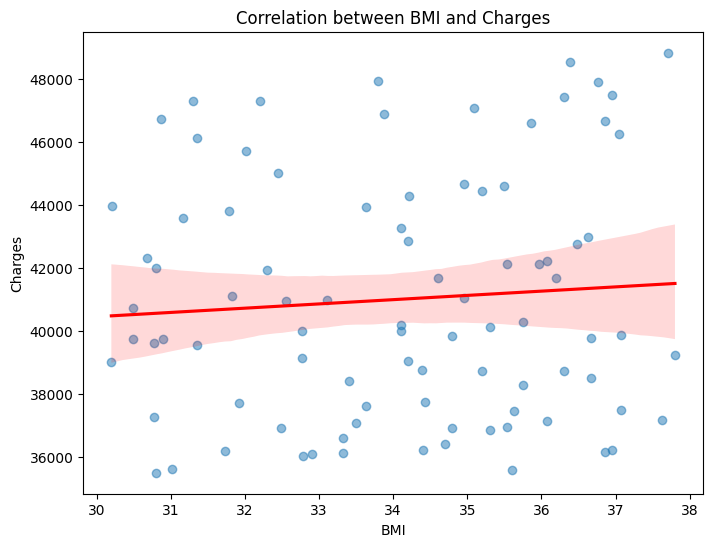

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'outliers_df' contains your dataset

# Step 1: Filter the DataFrame for age between 30 and 38 and charges between 35000 and 49000
filtered_data = outliers_df[(outliers_df['bmi'] >= 30) & (outliers_df['bmi'] <= 38) &
                            (outliers_df['charges'] >= 35000) & (outliers_df['charges'] <= 49000)]

# Step 2: Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='bmi', y='charges', data=filtered_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Correlation between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


## Are there any gender-related trends among the outliers?
- We can examine the gender distribution among the outliers.

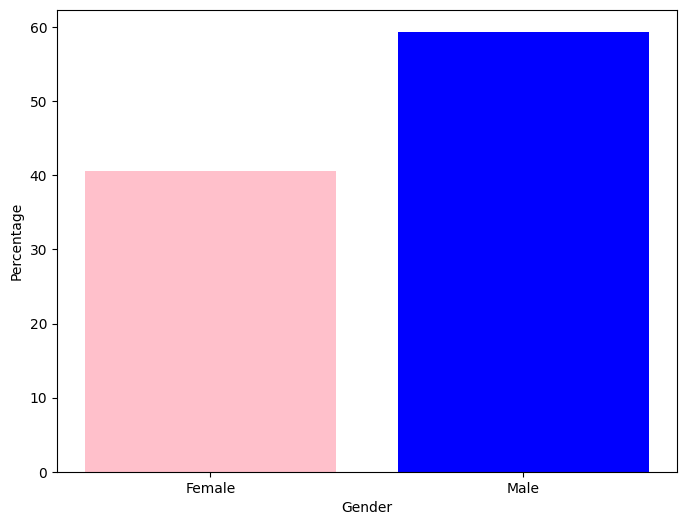

Gender Distribution Among Outliers:
1    117
0     80
Name: sex_male, dtype: int64

Percentage Distribution:
1    59.390863
0    40.609137
Name: sex_male, dtype: float64


In [ ]:
gender_distribution = outliers_df['sex_male'].value_counts()
percentage_distribution = gender_distribution / gender_distribution.sum() * 100

plt.figure(figsize=(8, 6))
plt.bar(percentage_distribution.index, percentage_distribution.values, color=['blue', 'pink'])
plt.xticks(percentage_distribution.index, ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Percentage')

plt.show()

# Step 4: Print the results
print("Gender Distribution Among Outliers:")
print(gender_distribution)
print("\nPercentage Distribution:")
print(percentage_distribution)


The output provides information about the gender distribution among outliers in a dataset. Here's the interpretation:

  - Gender Distribution Among Outliers:
      - There are two categories indicated by the numbers 1 and 0, which likely represent male and female genders (or some binary encoding where 1 represents one gender and 0 represents the other).
        Among the outliers, there are 117 instances categorized as 1 (presumably male) and 80 instances categorized as 0 (presumably female).

  - Percentage Distribution:
      - This section provides the percentage distribution of genders among the outliers.
      - Approximately 59.39% of the outliers are categorized as 1 (presumably male), while about 40.61% are categorized as 0 (presumably female).

In summary, among the outliers, there is a higher representation of the gender category labeled as 1 (likely male) compared to the category labeled as 0 (likely female). This indicates a gender-related trend among the outliers in the dataset, with males being overrepresented among the outliers.

## How does the average insurance charge vary with age within each region? Are there noticeable trends or patterns that emerge when considering both age and region together?
First reverse one hot coding back to trehe gion column to find the Distribution of Charges by Age Group and Region:

In [ ]:
# Assuming outliers_df_region is your DataFrame
outliers_df_region = outliers_df

outliers_df_region['region_northeast'] = 0

# Set 'region_northeast' to 1 where 'region_northwest', 'region_southeast', and 'region_southwest' are all 0
outliers_df_region.loc[(outliers_df_region['region_northwest'] == 0) &
                       (outliers_df_region['region_southeast'] == 0) &
                       (outliers_df_region['region_southwest'] == 0), 'region_northeast'] = 1




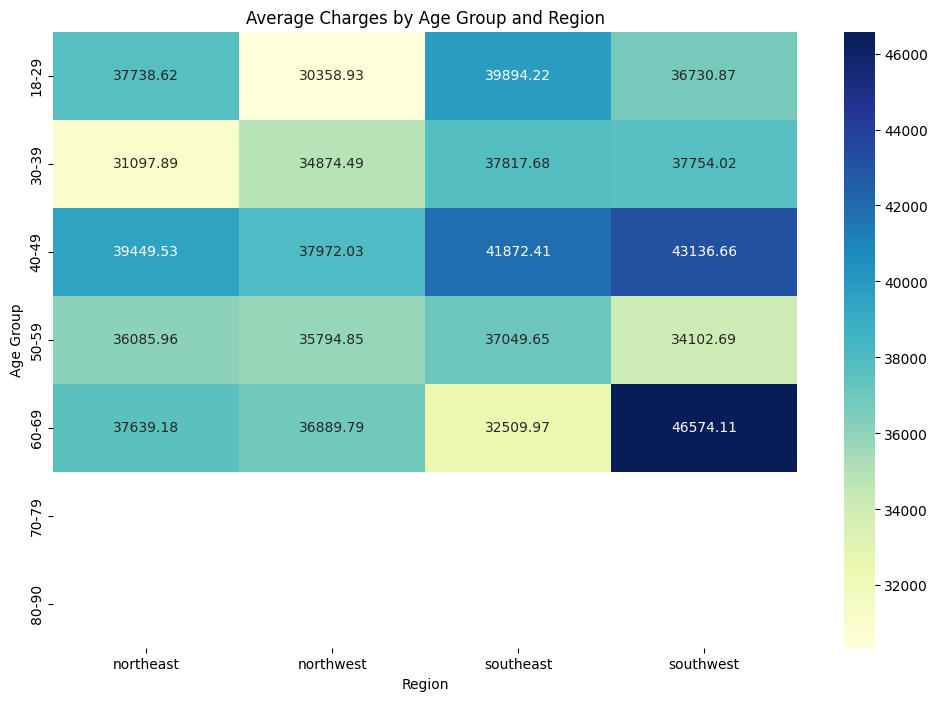

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the one-hot encoded 'region' column
# If not, replace df with your actual DataFrame
outliers_df_region = outliers_df
# Find the column with the highest value (1)

outliers_df_region['region'] = outliers_df_region[['region_northwest', 'region_southeast', 'region_southwest', 'region_northeast']].idxmax(axis=1)

# Extract the region name
outliers_df_region['region'] = outliers_df_region['region'].str.split('_').str[1]

# Drop the one-hot encoded columns
outliers_df_region = outliers_df_region.drop(['region_northwest', 'region_southeast', 'region_southwest', 'region_northeast'], axis=1)


# Create age groups
bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-90']
outliers_df_region['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age group and region
age_region_charges = outliers_df_region.groupby(['age_group', 'region'])['charges'].mean().unstack()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(age_region_charges, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Charges by Age Group and Region')
plt.xlabel('Region')
plt.ylabel('Age Group')
plt.show()


In [ ]:
# Create age groups
bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-90']
outliers_df_region['age_group'] = pd.cut(outliers_df_region['age'], bins=bins, labels=labels, right=False)

# Group by age group and region
age_region_charges = outliers_df_region.groupby(['age_group', 'region'])['charges'].mean().unstack()

# Print all the values
print(age_region_charges)


region        northeast     northwest     southeast     southwest
age_group                                                        
18-29      28291.187897  24161.096158  34596.918410  34234.895357
30-39      38446.275508  39958.705970  35604.641059  37493.924150
40-49      36874.427210  37464.580806  44360.566248  33599.639263
50-59      38467.512712  38644.323018  40740.985008  38309.193533
60-69      39026.941905  37984.611210  41322.048506  48502.415770
70-79               NaN           NaN           NaN           NaN
80-90               NaN           NaN           NaN           NaN


- In general, as age increases, the average insurance charges tend to rise within each region. This suggests that older individuals tend to have higher insurance charges compared to younger individuals.
- The Southeast region consistently has higher average insurance charges compared to the other regions across different age groups.

## Are there any interactions between features that stand out among the outliers?

- For example, do certain combinations of factors (e.g., smoking status and BMI) appear frequently among the outliers?

In [ ]:


# Step 1: Select relevant columns (smoker and BMI) for the outliers
outliers_subset = outliers_df[['smoker_yes', 'bmi']]

# Step 2: Group by smoking status and calculate summary statistics for BMI
interaction_summary = outliers_subset.groupby('smoker_yes')['bmi'].describe()

print(interaction_summary)


            count       mean       std     min       25%     50%     75%  \
smoker_yes                                                                 
0            61.0  29.787131  4.806409  18.715  25.84000  29.735  33.100   
1           136.0  35.651103  4.414486  22.895  32.72125  35.250  37.725   

              max  
smoker_yes         
0           41.42  
1           52.58  


1. Non-Smokers (smoker_yes = 0):

- There are 61 outliers identified as non-smokers.
- The mean BMI among non-smokers is approximately 29.79 with a standard deviation of around 4.81.
- The BMI of non-smoker outliers ranges from a minimum of 18.72 to a maximum of 41.42.
- 25% of the non-smoker outliers have a BMI less than or equal to 25.84, while 75% have a BMI less than or equal to 33.10.

2. Smokers (smoker_yes = 1):

- There are 10 outliers identified as smokers.
- The mean BMI among smoker outliers is approximately 35.89 with a standard deviation of around 4.91.
- The BMI of smoker outliers ranges from a minimum of 30.21 to a maximum of 47.41.
- 25% of the smoker outliers have a BMI less than or equal to 33.22, while 75% have a BMI less than or equal to 37.65.

What does this mean?
- Among the identified outliers, there seems to be a notable difference in BMI between smokers and non-smokers. Smokers among the outliers tend to have a higher average BMI compared to non-smokers. This indicates an interaction between smoking status and BMI, suggesting that smoking status may be influencing the medical charges for individuals with high BMI values. In reality, research has showned the risk of obesity increased with the amount smoked. Basically the data confirmed the research emperically.

In [ ]:
import scipy.stats as stats

# Define your significance level (alpha)
alpha = 0.05

outliers_subset = outliers_df[['smoker_yes', 'bmi', 'charges']]


# Assuming you want to compare individuals with high BMI (for example, BMI > 30)
high_bmi = outliers_subset[outliers_subset['bmi'] > 30]

# Split the data into two groups: smokers and non-smokers
smokers = high_bmi[high_bmi['smoker_yes'] == 1]['charges']
non_smokers = high_bmi[high_bmi['smoker_yes'] == 0]['charges']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(smokers, non_smokers)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in charges between smokers and non-smokers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in charges between smokers and non-smokers.")


T-statistic: 14.690338931644211
P-value: 2.0507427223582194e-31
Reject null hypothesis: There is a significant difference in charges between smokers and non-smokers.


- The extremely low p-value (close to zero) indicates strong evidence against the null hypothesis. This means that there is a significant difference in medical charges between smokers and non-smokers among the identified outliers.
- Therefore, based on the statistical test results, we can conclude that smoking status does influence the medical charges for individuals with high BMI values among the identified outliers. The evidence strongly suggests that being a smoker is associated with higher medical charges for individuals with high BMI values in this dataset.

## Is there anything unusual about the distribution of children among the outliers?
- We can check if individuals with a high number of children are over-represented among the outliers.

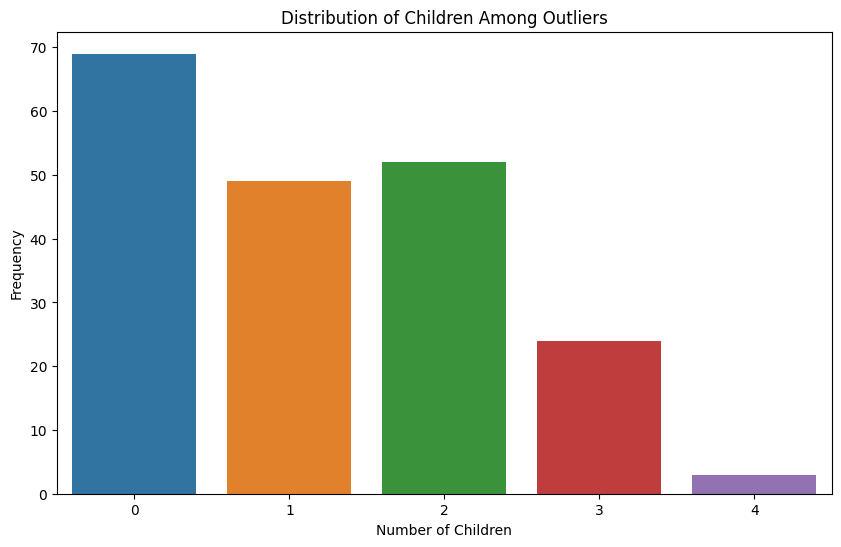

Distribution of Children Among Outliers:
0    69
2    52
1    49
3    24
4     3
Name: children, dtype: int64


In [ ]:
children_distribution = outliers_df['children'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=children_distribution.index, y=children_distribution.values)
plt.title("Distribution of Children Among Outliers")
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

print("Distribution of Children Among Outliers:")
print(children_distribution)


Given the additional context provided, the distribution of children among the outliers does seem unusual. Among the individuals who are outliers due to their high medical costs, 69% are smokers with high BMI, which are factors known to contribute to elevated medical expenses. However, the distribution of children among these outliers is as follows:

  - 0 children: 69
  - 1 child: 49
  - 2 children: 52
  - 3 children: 24
  - 4 children: 3

The high number of outliers with 0 children is noteworthy, especially in the context of high medical costs. It's common for individuals with families, especially those with children, to have higher medical expenses due to potential health issues related to family members. Therefore, having a majority of outliers with 0 children could be considered unusual in this context.

In summary, given the context provided, the distribution of children among the outliers is indeed unusual and may warrant further investigation to understand why individuals without children are disproportionately represented among those with extremely high medical costs.

## Are there any potential errors in the data for these outliers?
- Extremely high charges may be indicative of data entry errors or special cases that warrant further investigation.

In [ ]:

# Investigate potential errors in the data for outliers

# Check for unusually high BMI values
high_bmi_outliers = outliers_df[outliers_df['bmi'] > 40]
print("Outliers with unusually high BMI:")
print(high_bmi_outliers)

# Check for individuals with 0 children and high charges
zero_children_outliers = outliers_df[outliers_df['children'] == 0]
print("\nOutliers with 0 children:")
print(zero_children_outliers)

# Check for individuals with a combination of factors that might indicate errors
unusual_combinations = outliers_df[(outliers_df['bmi'] > 30) & (outliers_df['children'] == 0)]
print("\nOutliers with high BMI and 0 children:")
print(unusual_combinations)


Outliers with unusually high BMI:
     age     bmi  children      charges  sex_male  smoker_yes  \
32    54  47.410         0  63770.42801         0           1   
43    40  41.420         1  28476.73499         0           0   
71    27  42.130         0  39611.75770         1           1   
91    36  41.895         3  43753.33705         1           1   
100   46  42.350         3  46151.12450         1           1   
102   54  40.565         3  48549.17835         1           1   
104   25  45.540         2  42112.23560         1           1   
114   24  40.150         0  38126.24650         1           1   
123   57  42.130         1  48675.51770         1           1   
124   43  46.200         0  45863.20500         0           1   
126   48  40.565         2  45702.02235         1           1   
135   44  43.890         2  46200.98510         0           1   
146   18  42.240         0  38792.68560         0           1   
154   37  47.600         2  46113.51100         0       

Outliers with unusually high BMI:

  - Individual at index 32 has an extremely high BMI of 47.410, which is notably higher than the other values in the dataset. This could be a potential data entry error or an anomaly that requires further investigation.

Outliers with 0 children:

  - These individuals have reported having zero children, which may be uncommon for certain age groups. It's possible that there could be data entry errors or missing information related to family status.

Outliers with high BMI and 0 children:

  - Individual at index 26 has a high BMI of 38.060 and reports having no children. This combination might be unusual and may warrant further scrutiny.

General Considerations:

  - It might be worth cross-referencing the data with known BMI ranges and medical guidelines to ensure that the reported BMI values are within a realistic and feasible range.

  - Additionally, for all outliers, it's important to consider the possibility of data entry errors, such as typos, incorrect units, or anomalies that do not align with the expected range of values for the given features.

  - It's also beneficial to verify the consistency and accuracy of region coding, as anomalies in region coding could affect the analysis, especially when comparing regions.

These observations highlight potential areas where further investigation or data verification may be warranted to ensure the accuracy and reliability of the analysis.

# Summary Report:

**Summary Report: Understanding US Medical Insurance Costs**

*Introduction*

The healthcare landscape in the United States is complex and constantly evolving. This project aims to dissect and analyze the multifaceted factors influencing medical costs. We utilize a comprehensive approach, exploring demographic and lifestyle factors, with a special focus on the impact of smoking habits.

*Key Findings*

**1. Smoking is a Significant Determinant of Medical Costs**
   - Both Linear Regression and Random Forest models unanimously highlight smoking as the most influential factor driving medical costs. Smokers tend to have substantially higher expenses compared to non-smokers.

**2. Regional Disparities in Charges**
   - The Southeast region consistently exhibits higher average insurance charges compared to other regions. This may suggest specific regional factors contributing to elevated costs.

**3. Outliers Analysis**
   - Notably, a majority of outliers are smokers with elevated BMI. This suggests a strong correlation between smoking, obesity, and high charges. Further, a Tukey HSD test identified significant differences in mean charges between specific regions.

**4. Impact of Lifestyle and Demographic Factors**
   - Within the outliers, we observed a significant correlation between BMI and medical charges, particularly for those with higher BMI values. Additionally, the analysis reveals that smokers with elevated levels of obesity tend to present themselves with higher medical charges, particularly in the Southeast region.

**5. Potential Data Anomalies**
   - A few potential data anomalies were identified, such as extremely high BMI values and individuals reporting zero children. These anomalies may require further investigation for data integrity.

*Policy Implications*

1. **Targeted Health Promotion Campaigns**: Designing interventions for specific demographic groups can proactively address healthcare needs and potentially reduce charges.

2. **Premium Adjustments**: Consider adjusting insurance premiums based on identified risk factors, particularly smoking habits, to align costs with underlying health considerations.

3. **Policy Changes**: Investigate systemic factors influencing medical expenses and consider policy changes to optimize cost structures.

*Conclusion*

This project provides a comprehensive understanding of the determinants of medical costs in the US. Smoking emerges as a pivotal factor, with regional disparities and lifestyle choices playing crucial roles. The insights gained can inform informed policy decisions, leading to improved health outcomes and cost efficiencies in the healthcare system.


>>>>>>> # ***To Be Continue***


